# Proyecto final Machine learning con Python
Jorge Ruizvisfocri
Emilio Martinez

## Paqueterías de trabajo

In [4]:
from pathlib import Path
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

## Cargamos datos de trabajo

In [7]:
### Imágenes
data_dir = Path("D://bases de datos//proyecto final machine learning//Detecting PIK3CA mutation in breast cancer") ## Directorio de datos

## Creamos direcciones de imagenes
### Entrenamiento
train_images_dir = data_dir / "train_input" / "images"
train_images_files = list(train_images_dir.rglob("*.jpg"))
### Prueba
test_images_dir = data_dir / "test_input" / "images"
test_images_files = list(test_images_dir.rglob("*.jpg"))

### Creamos direcciones de features

In [8]:
### Revisamos que las direcciones de las imágenes estén bien cargadas
print(
    f"Number of images\n"
    "-----------------\n"
    f"Train: {len(train_images_files)}\n" # 344 x 1000 = 344,000 tiles
    f"Test: {len(test_images_files)}\n"  # 149 x 1000 = 149,000 tiles
    f"Total: {len(train_images_files) + len(test_images_files)}\n"  # 493 x 1000 = 493,000 tiles
)

Number of images
-----------------
Train: 344000
Test: 149000
Total: 493000



In [10]:
### Cargamos datos de y
y_train = pd.read_csv(data_dir  / "train_output.csv")

In [13]:
### Vemos dimension de y_train
print(len(y_train))

344


In [14]:
### Cargamos imágenes para primer muestra
ID_001_tiles = [p for p in train_images_files if 'ID_001' in p.name]

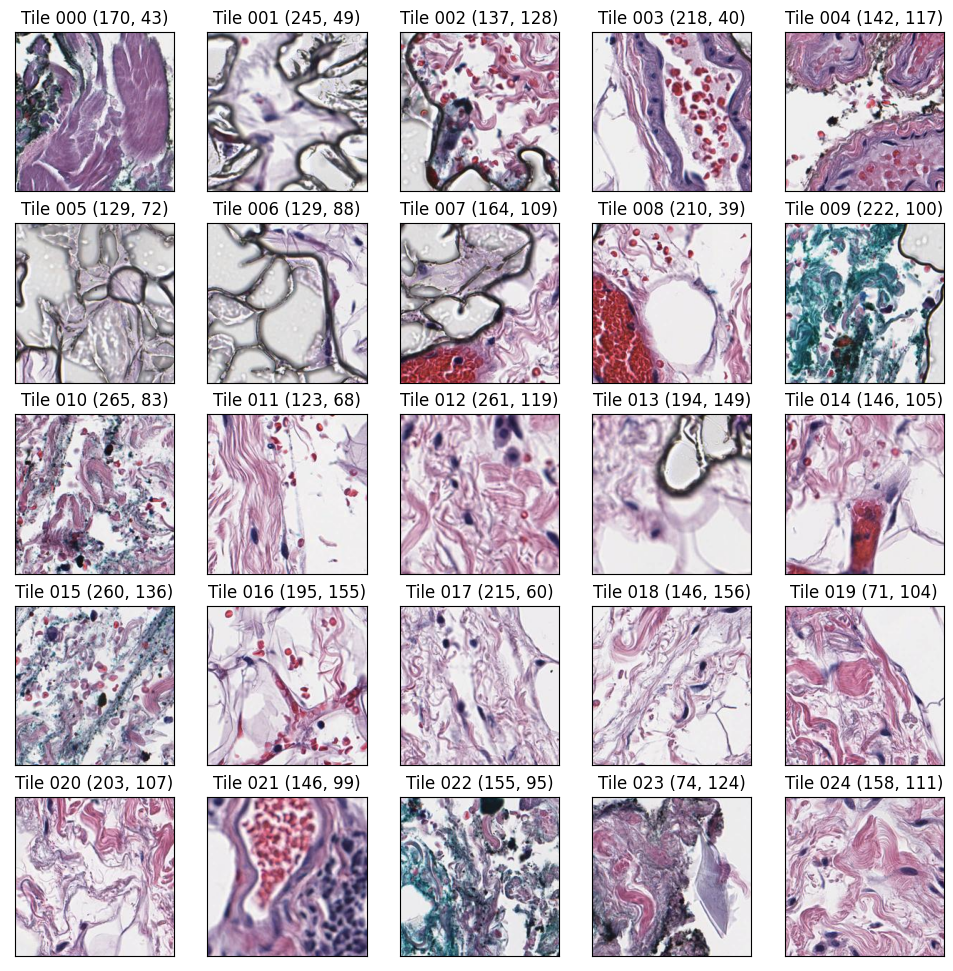

In [16]:
fig, axes = plt.subplots(5, 5)
fig.set_size_inches(12, 12)

for i, img_file in enumerate(ID_001_tiles[:25]):
    # get the metadata from the file path
    _, metadata = str(img_file).split("tile_")
    id_tile, level, x, y = metadata[:-4].split("_")
    img = plt.imread(img_file)
    ax = axes[i//5, i%5]
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Tile {id_tile} ({x}, {y})")
plt.show()

In [18]:
sample = "ID_001.npy"
_features = np.load(train_features_dir / sample)
coordinates, features = _features[:, :3], _features[:, 3:]
print("xy features coordinates")
coordinates[:10, 1:].astype(int)

NameError: name 'train_features_dir' is not defined

## Procesamiento de datos para entrenamiento

## Entrenamiento

### Red neuronal

### Entrenamos